In [1]:
import os
import sys
sys.path.append(os.getcwd() + '/../../')
import plda
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Load Data.

In [2]:
# To minimize the size of this repository, I only provide 100 training and testing images.
X_train = np.load('mnist_train_images.npy')
Y_train = np.load('mnist_train_labels.npy')
X_test = np.load('mnist_test_images.npy')
Y_test = np.load('mnist_test_labels.npy')

In [3]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(100, 784) (100,)
(100, 784) (100,)


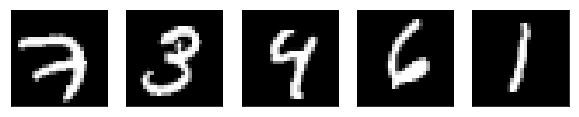

In [4]:
n_examples = 5
fig, ax_arr = plt.subplots(1, n_examples, figsize=(10, 2))

for x in range(n_examples):
    ax_arr[x].imshow(X_train[x].reshape(28, 28), cmap='gray')
    ax_arr[x].set_xticks([])
    ax_arr[x].set_yticks([])
plt.show()

# Preprocess data via Principal Components Analysis.

In [5]:
pca = PCA(n_components = 5)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
X_train_preprocessed = pca.transform(X_train)
X_test_preprocessed = pca.transform(X_test)

# Create a PLDA classifier and obtain model predictions for the test data.

In [7]:
classifier = plda.Classifier(X_train_preprocessed, Y_train)
classifier.fit_model()

predictions, log_p_predictions = classifier.predict(X_test_preprocessed, standardize_data=True)

# Calculate mean performance after training on 100 training data.

In [8]:
(Y_test == predictions).mean()

0.51

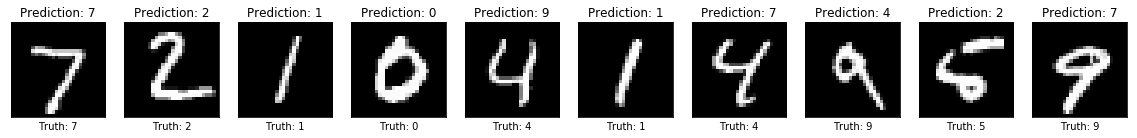

In [9]:
n_examples = 10
fig, ax_arr = plt.subplots(1, n_examples, figsize=(20, 2))

for x in range(n_examples):
    ax_arr[x].imshow(X_test[x].reshape(28, 28), cmap='gray')
    ax_arr[x].set_xticks([])
    ax_arr[x].set_yticks([])
    title = 'Prediction: {}'
    xlabel = 'Truth: {}'
    ax_arr[x].set_title(title.format(predictions[x]))
    ax_arr[x].set_xlabel(xlabel.format(Y_test[x]))
plt.show()